<hr style='border-top:4px solid #1F77B4;'>

<h2><span style="color: #1F77B4; font-size: 40px">Chapitre 4</span>  </h2>

<h1><span style="color: #1F77B4; font-size: 60px"> Les réseaux de neurones profonds</span> </h1>

<h3><span style="color: #1F77B4; font-size: 50px"> Augmentation des données</span> </h3>

<hr style='border-top:4px solid #1F77B4;'>

### Importation des bibliothèques

In [1]:
import numpy                         as np
import tensorflow                    as tf
import matplotlib.pyplot             as plt
from tensorflow.keras.datasets       import cifar10
from tensorflow.keras.models         import Sequential
from tensorflow.keras.layers         import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.backend                   import clear_session
from IPython.display                 import display, HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

<hr style='border-top:4px solid #1F77B4;'>

In [3]:
def save_figure(fig, path):
    # Extraire le répertoire du chemin donné
    directory = os.path.dirname(path)
    
    # Créer le répertoire s'il n'existe pas
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Sauvegarder dans plusieurs formats
    fig.savefig(f"{path}.pdf", format="pdf")
    fig.savefig(f"{path}.png", format="png")
    fig.savefig(f"{path}.jpg", format="jpg")

In [4]:
# Définir le modèle CNN simple
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

<hr style='border-top:4px solid #1F77B4;'>

<h3><span style="font-size: 30px">🎴</span> Figure 4.14 : Augmentation de données à partir d'une image de la base de données CIFAR-10</h3>

- (a) Rotation et zoom
- (b) Décalage horizontal et inversion horizontale
- (c) Transformation en cisaillement + décalage vertical
- (d) Rotation légère et zoom
- (e) Inversion horizontale

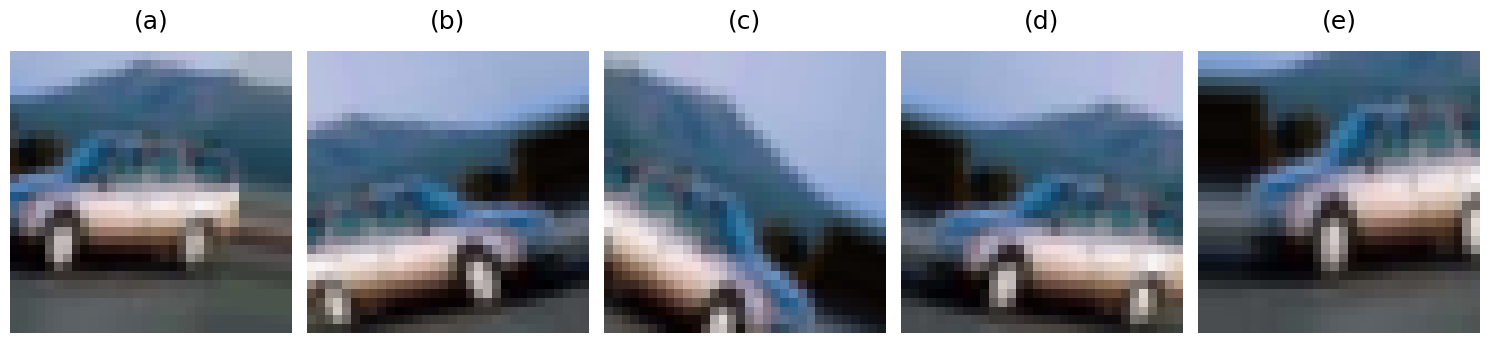

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import numpy as np

# Charger les données CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Identifier une image de la classe "Automobile" (classe 1)
automobile_class = 1
automobile_indices = np.where(y_train == automobile_class)[0]
automobile_image = x_train[automobile_indices[0]]  # Première image "Automobile"

# Générateur avec augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Créer la figure
fig = plt.figure(figsize=(15, 5))

# Préparer l'image pour le générateur
automobile_image = np.expand_dims(automobile_image, 0)
titles = ['(a)', '(b)', '(c)', '(d)', '(e)']

# Générer et afficher 5 images
for i, batch in enumerate(datagen.flow(automobile_image, batch_size=1)):
    img = batch[0].astype('uint8')

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(titles[i], y=1.05, fontsize=18)  # Titre sous l'image

    if i == 4:
        break

plt.tight_layout()
plt.show()

# Sauvegarder la figure
save_figure(fig, "Figures/Figure_4.14/Chap4_Figure_4.14")

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 4.11 : Augmentation des données </h3>

### Préparation des données CIFAR-10

In [6]:
from tensorflow.keras.datasets import cifar10

# Charger les données CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normaliser les données (valeurs des pixels entre 0 et 1)
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Convertir les étiquettes en format one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test  = tf.keras.utils.to_categorical(y_test, 10)

### Entraînement sans augmentation des données

In [7]:
# Entraînement sans augmentation des données
model_no_aug   = create_model()
history_no_aug = model_no_aug.fit(x_train, y_train, batch_size=64,
                                  epochs=100,  
                                  validation_data=(x_test, y_test), 
                                  verbose=2)


Epoch 1/100
782/782 - 9s - 11ms/step - accuracy: 0.3092 - loss: 1.8449 - val_accuracy: 0.4578 - val_loss: 1.5150
Epoch 2/100
782/782 - 8s - 10ms/step - accuracy: 0.4499 - loss: 1.5107 - val_accuracy: 0.5249 - val_loss: 1.3193
Epoch 3/100
782/782 - 7s - 9ms/step - accuracy: 0.5140 - loss: 1.3535 - val_accuracy: 0.5662 - val_loss: 1.2209
Epoch 4/100
782/782 - 8s - 10ms/step - accuracy: 0.5506 - loss: 1.2631 - val_accuracy: 0.6038 - val_loss: 1.1250
Epoch 5/100
782/782 - 7s - 9ms/step - accuracy: 0.5761 - loss: 1.1934 - val_accuracy: 0.6189 - val_loss: 1.0680
Epoch 6/100
782/782 - 8s - 10ms/step - accuracy: 0.6036 - loss: 1.1355 - val_accuracy: 0.6379 - val_loss: 1.0276
Epoch 7/100
782/782 - 7s - 9ms/step - accuracy: 0.6203 - loss: 1.0841 - val_accuracy: 0.6515 - val_loss: 0.9867
Epoch 8/100
782/782 - 8s - 10ms/step - accuracy: 0.6378 - loss: 1.0381 - val_accuracy: 0.6636 - val_loss: 0.9534
Epoch 9/100
782/782 - 7s - 9ms/step - accuracy: 0.6538 - loss: 0.9996 - val_accuracy: 0.6658 - val_

Epoch 74/100
782/782 - 7s - 9ms/step - accuracy: 0.8450 - loss: 0.4238 - val_accuracy: 0.6980 - val_loss: 1.2367
Epoch 75/100
782/782 - 7s - 10ms/step - accuracy: 0.8493 - loss: 0.4173 - val_accuracy: 0.6988 - val_loss: 1.3032
Epoch 76/100
782/782 - 7s - 9ms/step - accuracy: 0.8483 - loss: 0.4181 - val_accuracy: 0.6989 - val_loss: 1.2731
Epoch 77/100
782/782 - 8s - 10ms/step - accuracy: 0.8508 - loss: 0.4128 - val_accuracy: 0.7024 - val_loss: 1.3039
Epoch 78/100
782/782 - 7s - 9ms/step - accuracy: 0.8529 - loss: 0.4068 - val_accuracy: 0.6940 - val_loss: 1.3460
Epoch 79/100
782/782 - 8s - 10ms/step - accuracy: 0.8499 - loss: 0.4130 - val_accuracy: 0.7023 - val_loss: 1.3057
Epoch 80/100
782/782 - 7s - 9ms/step - accuracy: 0.8536 - loss: 0.4095 - val_accuracy: 0.6998 - val_loss: 1.3125
Epoch 81/100
782/782 - 8s - 10ms/step - accuracy: 0.8551 - loss: 0.4017 - val_accuracy: 0.7023 - val_loss: 1.2931
Epoch 82/100
782/782 - 7s - 9ms/step - accuracy: 0.8559 - loss: 0.3957 - val_accuracy: 0.697

### Entraînement avec augmentation des données

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Entraînement avec augmentation des données
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.15
)

datagen.fit(x_train)

model_with_aug = create_model()
history_with_aug = model_with_aug.fit(datagen.flow(x_train, y_train, batch_size=64, seed=42), 
                                      epochs=100, 
                                      validation_data=(x_test, y_test), 
                                      verbose=2)

Epoch 1/100


782/782 - 32s - 41ms/step - accuracy: 0.2550 - loss: 1.9757 - val_accuracy: 0.3975 - val_loss: 1.6313
Epoch 2/100
782/782 - 31s - 39ms/step - accuracy: 0.3548 - loss: 1.7385 - val_accuracy: 0.4748 - val_loss: 1.4562
Epoch 3/100
782/782 - 31s - 39ms/step - accuracy: 0.4033 - loss: 1.6247 - val_accuracy: 0.5117 - val_loss: 1.3297
Epoch 4/100
782/782 - 31s - 40ms/step - accuracy: 0.4374 - loss: 1.5521 - val_accuracy: 0.5161 - val_loss: 1.3073
Epoch 5/100
782/782 - 30s - 39ms/step - accuracy: 0.4646 - loss: 1.4929 - val_accuracy: 0.5322 - val_loss: 1.2957
Epoch 6/100
782/782 - 30s - 39ms/step - accuracy: 0.4782 - loss: 1.4520 - val_accuracy: 0.5532 - val_loss: 1.2111
Epoch 7/100
782/782 - 30s - 39ms/step - accuracy: 0.4930 - loss: 1.4219 - val_accuracy: 0.4981 - val_loss: 1.4610
Epoch 8/100
782/782 - 31s - 39ms/step - accuracy: 0.5071 - loss: 1.3879 - val_accuracy: 0.5919 - val_loss: 1.1372
Epoch 9/100
782/782 - 31s - 40ms/step - accuracy: 0.5162 - loss: 1.3601 - val_accuracy: 0.5832 - val

Epoch 73/100
782/782 - 34s - 43ms/step - accuracy: 0.6683 - loss: 0.9818 - val_accuracy: 0.7130 - val_loss: 0.8621
Epoch 74/100
782/782 - 33s - 42ms/step - accuracy: 0.6657 - loss: 0.9850 - val_accuracy: 0.7187 - val_loss: 0.8159
Epoch 75/100
782/782 - 33s - 43ms/step - accuracy: 0.6677 - loss: 0.9885 - val_accuracy: 0.7182 - val_loss: 0.8147
Epoch 76/100
782/782 - 33s - 42ms/step - accuracy: 0.6703 - loss: 0.9824 - val_accuracy: 0.7157 - val_loss: 0.8363
Epoch 77/100
782/782 - 33s - 42ms/step - accuracy: 0.6709 - loss: 0.9761 - val_accuracy: 0.7369 - val_loss: 0.7619
Epoch 78/100
782/782 - 33s - 42ms/step - accuracy: 0.6699 - loss: 0.9817 - val_accuracy: 0.7359 - val_loss: 0.7647
Epoch 79/100
782/782 - 33s - 43ms/step - accuracy: 0.6676 - loss: 0.9784 - val_accuracy: 0.7259 - val_loss: 0.8193
Epoch 80/100
782/782 - 33s - 42ms/step - accuracy: 0.6686 - loss: 0.9778 - val_accuracy: 0.7159 - val_loss: 0.8358
Epoch 81/100
782/782 - 33s - 42ms/step - accuracy: 0.6696 - loss: 0.9781 - val_a

### Visualisation des courbes d'apprentissage (précision)

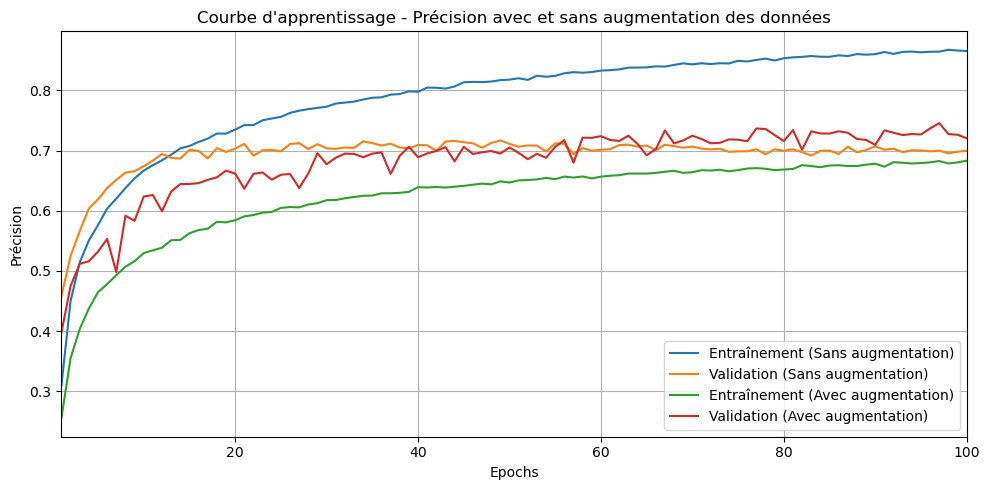

In [9]:
# Fonction permettant de tracer des courbes d'apprentissage (précision)
def plot_learning_curves(history, label):
    epochs = range(1, len(history.history['accuracy']) + 1)
    plt.plot(epochs, history.history['accuracy'], label=f'Entraînement ({label})')
    plt.plot(epochs, history.history['val_accuracy'], label=f'Validation ({label})')

# Tracer les courbes de précision
fig = plt.figure(figsize=(10, 5))
plot_learning_curves(history_no_aug, 'Sans augmentation')
plot_learning_curves(history_with_aug, 'Avec augmentation')

plt.title("Courbe d'apprentissage - Précision avec et sans augmentation des données")
plt.xlabel('Epochs')
plt.ylabel('Précision')
plt.legend()
plt.xlim(1, 100)
plt.grid(True)
plt.tight_layout()
plt.show()

### Visualisation des courbes de pertes

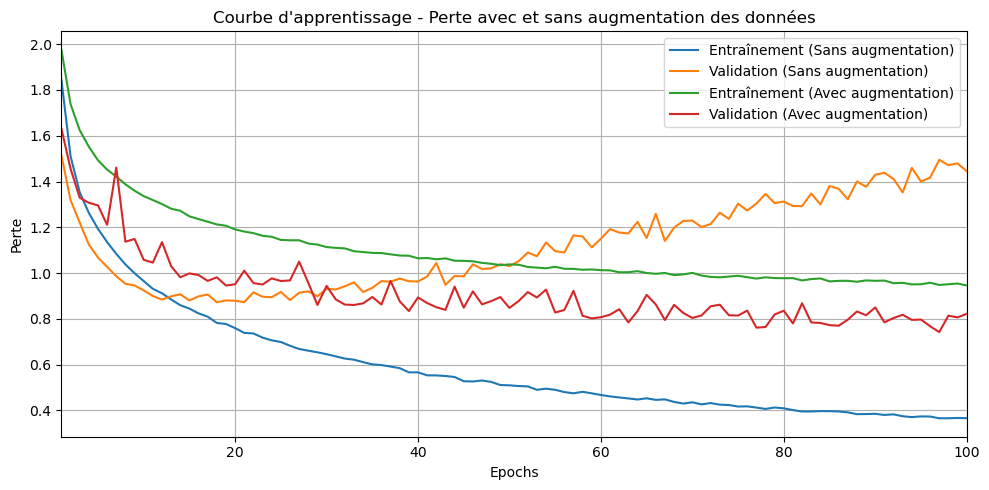

In [10]:
# Function to plot loss curves
def plot_loss_curves(history, label):
    epochs = range(1, len(history.history['accuracy']) + 1)
    plt.plot(epochs, history.history['loss'], label=f'Entraînement ({label})')
    plt.plot(epochs, history.history['val_loss'], label=f'Validation ({label})')

# Tracer les courbes de perte
fig = plt.figure(figsize=(10, 5))
plot_loss_curves(history_no_aug, 'Sans augmentation')
plot_loss_curves(history_with_aug, 'Avec augmentation')

plt.title("Courbe d'apprentissage - Perte avec et sans augmentation des données")
plt.xlabel('Epochs')
plt.ylabel('Perte')
plt.xlim(1, 100)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<h3><span style="font-size: 30px">🎴</span> Figure 4.15 : Courbes de perte obtenues lors de l'entraînement du modèle (a) sans  augmentation de données et (b) avec augmentation des données</h3>

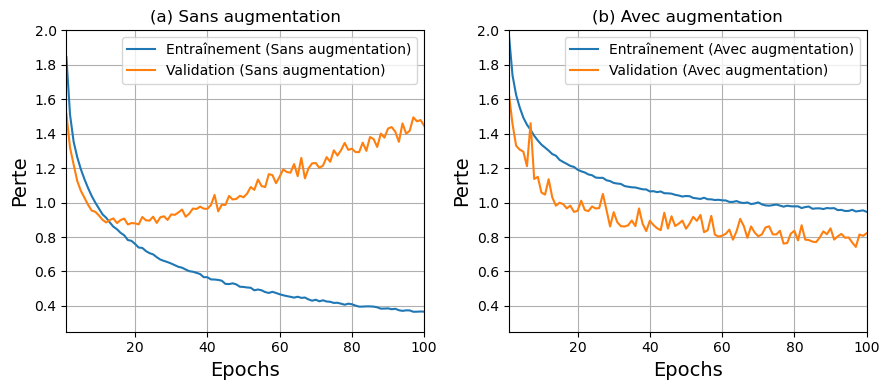

In [11]:
def plot_learning_curves(history, label):
    epochs = range(1, len(history.history['accuracy']) + 1)
    plt.plot(epochs, history.history['accuracy'], label=f'Entraînement ({label})')
    plt.plot(epochs, history.history['val_accuracy'], label=f'Validation ({label})')
    plt.xlabel('Epochs')
    plt.ylabel('Précision')
    plt.legend()
    plt.grid(True)

def plot_loss_curves(history, label):
    epochs = range(1, len(history.history['accuracy']) + 1)
    plt.plot(epochs, history.history['loss'], label=f'Entraînement ({label})')
    plt.plot(epochs, history.history['val_loss'], label=f'Validation ({label})')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Perte', fontsize=14)
    plt.legend()
    plt.grid(True)
    
    
# Créer des sous-graphes pour les courbes
fig = plt.figure(figsize=(9, 4))

# Tracer les courbes de perte pour "Sans augmentation"
plt.subplot(1, 2, 1)
plot_loss_curves(history_no_aug, 'Sans augmentation')
plt.title('(a) Sans augmentation' )
plt.xlim(1, 100)
plt.ylim(0.25, 2)

# Tracer les courbes de perte pour "Avec augmentation"
plt.subplot(1, 2, 2)
plot_loss_curves(history_with_aug, 'Avec augmentation')
plt.title('(b) Avec augmentation' )
plt.xlim(1, 100)
plt.ylim(0.25, 2)

plt.tight_layout()
plt.show()

# Sauvegarder la figure
save_figure(fig, "Figures/Figure_4.15/Chap4_Figure_4.15")

<h3><span style="font-size: 30px">&#128187;</span> Exemple 4.12 : Entraînement sans augmentation des données avec Arrêt précoce </h3>

In [12]:
from keras.callbacks import EarlyStopping

# Définir l'early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entraînement sans augmentation des données
model_no_aug_stop   = create_model()
history_no_aug_stop = model_no_aug.fit(x_train, y_train, batch_size=64,
                                  epochs=100,  
                                  validation_data=(x_test, y_test), 
                                  callbacks=[early_stopping],
                                  verbose=2)

Epoch 1/100
782/782 - 8s - 10ms/step - accuracy: 0.8693 - loss: 0.3601 - val_accuracy: 0.6974 - val_loss: 1.4704
Epoch 2/100
782/782 - 7s - 9ms/step - accuracy: 0.8714 - loss: 0.3542 - val_accuracy: 0.6969 - val_loss: 1.4934
Epoch 3/100
782/782 - 7s - 9ms/step - accuracy: 0.8681 - loss: 0.3611 - val_accuracy: 0.6999 - val_loss: 1.5323
Epoch 4/100
782/782 - 7s - 9ms/step - accuracy: 0.8724 - loss: 0.3508 - val_accuracy: 0.7015 - val_loss: 1.4653
Epoch 5/100
782/782 - 7s - 9ms/step - accuracy: 0.8695 - loss: 0.3588 - val_accuracy: 0.6937 - val_loss: 1.5434
Epoch 6/100
782/782 - 8s - 10ms/step - accuracy: 0.8703 - loss: 0.3533 - val_accuracy: 0.6963 - val_loss: 1.5429
Epoch 7/100
782/782 - 7s - 9ms/step - accuracy: 0.8728 - loss: 0.3504 - val_accuracy: 0.7005 - val_loss: 1.5193
Epoch 8/100
782/782 - 8s - 10ms/step - accuracy: 0.8741 - loss: 0.3457 - val_accuracy: 0.7056 - val_loss: 1.5521
Epoch 9/100
782/782 - 7s - 9ms/step - accuracy: 0.8729 - loss: 0.3489 - val_accuracy: 0.7040 - val_lo

<h3><span style="font-size: 30px">🎴</span> Figure 4.16 : Les courbes d'apprentissage du modèle sur les données d'entraînement et de validation. La droite rouge indique l'époque d'arrêt prématuré.</h3>

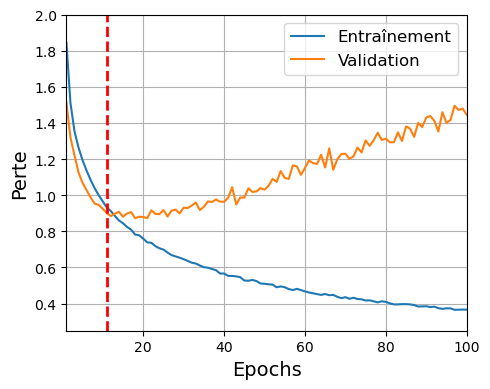

In [13]:
def plot_loss_curves(history, label):
    epochs = range(1, len(history.history['accuracy']) + 1)
    plt.plot(epochs, history.history['loss'], label=f'Entraînement')
    plt.plot(epochs, history.history['val_loss'], label=f'Validation')
    plt.xlabel('Epochs',fontsize=14)
    plt.ylabel('Perte',fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)


fig = plt.figure(figsize=(5, 4))

# Tracer les courbes de perte pour "Sans augmentation"
plot_loss_curves(history_no_aug, 'Sans augmentation')
plt.axvline(x=11, color="red", linestyle="--", linewidth=2, label="Early Stopping")

plt.xlim(1, 100)
plt.ylim(0.25, 2)

plt.tight_layout()
plt.show()

# Sauvegarder la figure
save_figure(fig, "Figures/Figure_4.16/Chap4_Figure_4.16")